# Telco customer churn

In [1]:
import pandas as pd
import seaborn as sns


## import data sets

In [11]:
customer = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer.shape

(7043, 21)

## Clean Data

In [13]:
#check for NaN distribution
for col in customer.columns:
    percent = customer[col].isnull().sum()/len(customer[col])
    print("%s %.2f"%(col,percent))
#ok seems no NaN found
length = len(customer)
#for those with object dtype check variation >.5
categorical_col = [ i for i in customer.dtypes.index if customer.dtypes[i] =='O']
print('We got %d categorical columns:'%(len(categorical_col)), categorical_col)
for col in categorical_col:
    print("%s :%d/%d"%(col,len(customer[col].unique()),length))

customerID 0.00
gender 0.00
SeniorCitizen 0.00
Partner 0.00
Dependents 0.00
tenure 0.00
PhoneService 0.00
MultipleLines 0.00
InternetService 0.00
OnlineSecurity 0.00
OnlineBackup 0.00
DeviceProtection 0.00
TechSupport 0.00
StreamingTV 0.00
StreamingMovies 0.00
Contract 0.00
PaperlessBilling 0.00
PaymentMethod 0.00
MonthlyCharges 0.00
TotalCharges 0.00
Churn 0.00
We got 18 categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
customerID :7043/7043
gender :2/7043
Partner :2/7043
Dependents :2/7043
PhoneService :2/7043
MultipleLines :3/7043
InternetService :3/7043
OnlineSecurity :3/7043
OnlineBackup :3/7043
DeviceProtection :3/7043
TechSupport :3/7043
StreamingTV :3/7043
StreamingMovies :3/7043
Contract :3/7043
PaperlessBilling :2/7043
PaymentMeth

## Feature selection

In [14]:
#ok we got 2 customerID obviously useless for training but TotalCharges which should be tranform to numerical
#setup target and drop customerID 
target = customer.Churn
customer = customer.drop(["customerID","Churn"], axis=1)
#can not directly convert TogtalCharges to float32 since it contains some item not numerical
#customer['TotalCharges'] = customer['TotalCharges'].astype("float64") <====Error

for i, tup in enumerate(customer['TotalCharges']):
    try:
        customer['TotalCharges'][i] = float(tup)
    except ValueError:
        #print("line:%d str:%s"%(i,tup))
        customer['TotalCharges'][i] = float(0)
#print("finished")
customer['TotalCharges'] = customer['TotalCharges'].astype("float64")
customer.head(10)

c:\users\sean\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\sean\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95


## Data Visualize

## total charge should be monthly charge multiply with tenure, then we can drop  totalcharges

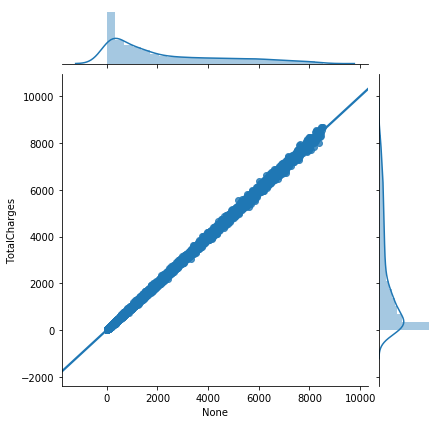

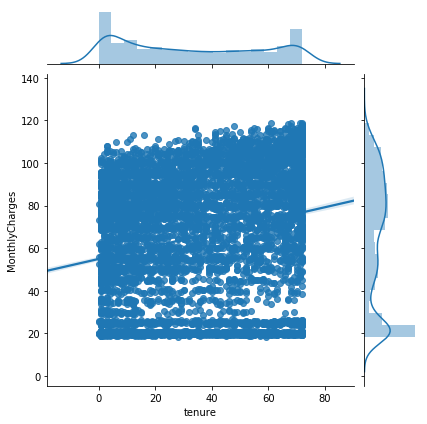

In [21]:
#create a polynomial feature 
features_2_drop = list()
my_total = customer.tenure*customer['MonthlyCharges']
sns.jointplot(my_total,customer.TotalCharges, kind='reg')
features_2_drop.append('TotalCharges')
sns.jointplot(customer.tenure,customer.MonthlyCharges, kind='reg') #seems not obviously related, well keep it.

## PhoneService is a subset of MultipleLines

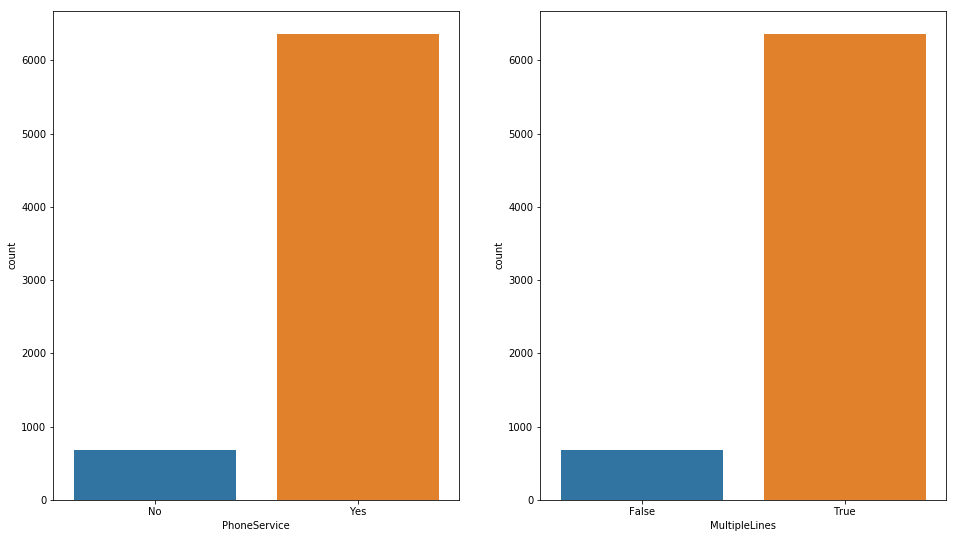

In [46]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(16,9))
sns.countplot(customer.PhoneService, ax=axs[0])
ds = customer['MultipleLines'].isin(['Yes','No'])
sns.countplot(ds, ax=axs[1])
features_2_drop.append('PhoneService')

In [ ]:
sns.lmplot()

In [50]:
#pd.get_dummies(customer)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(customer[['tenure','MonthlyCharges','TotalCharges']])
#rint(customer.head(10))


In [58]:
customer = pd.get_dummies(customer)
#customer.info()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

trainX, testX,trainY, testY = train_test_split(customer, target,train_size = 0.8 )
clf = RandomForestClassifier(n_estimators =,max_depth=10, random_state=0,min_samples_split =5)
clf.fit(trainX, trainY)

C:\Users\sean\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
clf.score(testX,testY)

0.7629524485450674